Análisis de la distribución de una muestra de datos
===

* 34:29 min | Ultima modificación: Marzo 21, 2021 | YouTube

In [1]:
import warnings

warnings.filterwarnings("ignore")

In [2]:
import numpy as np

Sea una muestra de datos obtenida de una distribución normal estándar

In [3]:
rng = np.random.default_rng(12345)
x = rng.normal(size=100)

## Modulo statistics de Python

In [4]:
import statistics as stats

# Media
stats.mean(x)

-0.028207783172759245

In [5]:
# Mediana
stats.median(x)

-0.029951996837220107

In [6]:
# desviacion estandar (p es la poblacional)
stats.stdev(x), stats.pstdev(x)

(0.945126072825009, 0.9403885689428003)

In [7]:
# varianza
stats.variance(x), stats.pvariance(x)

(0.8932632935336242, 0.8843306605982879)

## Histograma

In [8]:
import matplotlib.pyplot as plt

# histograma
plt.hist(
    x=x,
    bins='auto',
    color='tab:orange',
    alpha=0.6,
    rwidth=0.80,
)
plt.show()

<Figure size 640x480 with 1 Axes>

## Aproximación empírica de la función de densidad de probabilidad

A cada punto de la muestra de datos se le asigna una función unitaria de densidad de probabilidad.

![assets/fda.png](assets/fda.png)

Con:
 
* $N$: Número de puntos
* $K$: Kernel
* $h$: Ancho del kernel

Esto se conoce como una estimación no paramétrica de una función de densidad, y se utiliza para con el fin de estimar una función de densidad que no siga una distribución conocida, como la normal, exponencial, log-normal, entre otras. Normalmente se utiliza $h=1$.

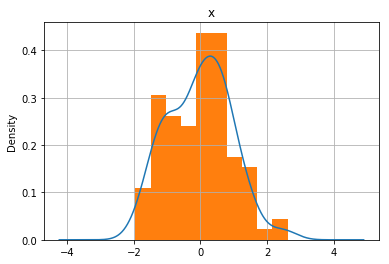

In [9]:
#
# Graficación del KDE con pandas
# 
import pandas as pd

fig, ax = plt.subplots()

df = pd.DataFrame({'x': x})
df.plot.kde(legend=False, ax=ax)
df.hist(density=True, ax=ax);

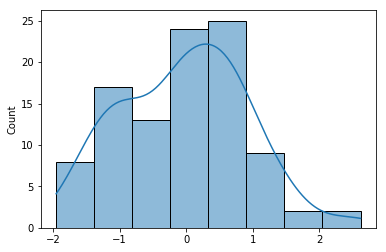

In [10]:
#
# Graficación del KDE con seaborn
#
import seaborn as sns

sns.histplot(np.array(x), kde=True)

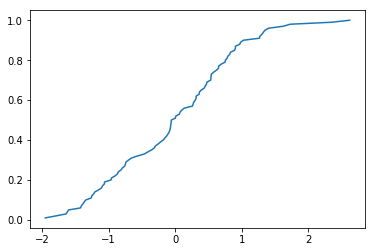

In [11]:
from statsmodels.distributions.empirical_distribution import ECDF

# Distribución acumulada empírica
ecdf = ECDF(x) 
plt.plot(ecdf.x, ecdf.y)
plt.show()

**Ejercicio.--** Una distribución Chi-cuadrada de $n$ grados de libertad se define como la variable aleatoria:

$$ z_1^2+...+z_n^2 = x_n^2$$

donde $z_i$ son números aleatorios provenientes de una distribución normal estándar. Realice las siguientes actividades:

* Genere 400 números aleatorios $x_i$ con $n = 5$ a partir de la definición anterior.
* En la misma figura grafique: (a) el histograma; (b) la distribución empírica; (c) la función de densidad de probabilidad para la distribución teórica chi-cuadrado con 5 grados de libertad.

## Pruebas de normalidad

Un problema típico de series de tiempo consiste en determinar si una muestra de datos proviene de una distribución normal. Para ello, se consideran las siguientes hipótesis:

* $H_0:$ Las observaciones ${x_1,…,x_T}$ provienen de una distribución normal con media y varianza desconocidas

* $H_a:$ Las observaciones provienen de una distribución arbitraria

Metodologías típicas:
* Gráfico Cuartil – Cuartil (Q-Q plot)
* Gráfico de probabilidad normal
* Prueba de Jarque-Bera


## Gráfica Cuartil-Cuartil (Q-Q plot)

Método gráfico para comparar dos distribuciones.  Si los datos provienen de la misma distribución, forman una línea recta. 

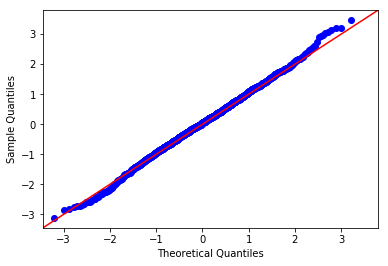

In [12]:
import statsmodels.api as sm

x = rng.normal(size=1500)
sm.qqplot(x, line ='45');

**Prueba de normalidad de Jarque-Bera** 

Se basa en determinar si los datos tienen la misma asimetría $(M_3)$ y curtosis $(M_4)$ de una distribución normal.

* $H_0:$ Los datos provienen de una distribución normal
* $H_a:$ Los datos no provienen de una distribución normal 

Esta prueba puede ser engañosa para muestras pequeñas. El rechazo de $H_0$ puede indicar:
* La presencia de observaciones atípicas
* Que la varianza no es constante
* La presencia de comportamiento no lineal (dependencia temporal)


In [13]:
from scipy.stats import jarque_bera

result = jarque_bera(x)
result.statistic, result.pvalue

(1.1447703557040292, 0.564178167328045)

In [14]:
from scipy.stats import shapiro

result = shapiro(x)
result.statistic, result.pvalue

(0.998629093170166, 0.2864187955856323)

In [15]:
from scipy.stats import anderson

result = anderson(x)
result

AndersonResult(statistic=0.3662562566566976, critical_values=array([0.574, 0.654, 0.785, 0.916, 1.089]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

**Ejercicio.--** Genere una muestra aleatoria de 1000 datos de la variable $z$, la cual está definida como $z = x + y$ donde $x$ sigue una distribución normal estándar, y $y$ sigue una distribución normal con media = 1 y varianza igual a 0.5. Grafique las distribuciones teórica  y empírica de $z$.